# Análise Descritiva de Clientes

### Desafio de Negócio:

- Objetivo: Ajudar a equipe de marketing a otimizar suas campanhas, segmentar clientes e melhorar o relacionamento com eles, usando uma análise detalhada dos atributos do cliente e suas interações com a empresa. 
- Utilizaremos ferramentas estatísticas descritivas para explorar os dados.

# Carregando os Pacotes

In [1]:
# Imports
import numpy as np                                  # Biblioteca para arrays e operações matemáticas
import pandas as pd                                 # Biblioteca para manipulação e análise de dados
import seaborn as sns                               # Biblioteca para visualização de dados baseada no matplotlib
import matplotlib.pyplot as plt                     # Biblioteca para criação de gráficos e visualizações
import warnings                                     # Biblioteca para controlar mensagens de aviso
from datetime import date

warnings.filterwarnings('ignore')                   # Ignora mensagens de aviso

In [2]:
# Set seed
np.random.seed(42)  # Define uma semente para garantir a reprodutibilidade dos resultados aleatórios

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ricardo de Souza Silva" 

Author: Ricardo de Souza Silva



# Carregando e Explorando os Dados

In [4]:
# Lista para identificar os valores ausentes
lista_labels_valores_ausentes = ["n/a,", "na", "undefined"]

In [5]:
dataset = pd.read_csv('marketing_campaign.csv', sep=';', na_values = lista_labels_valores_ausentes)

In [6]:
dataset.shape

(2240, 29)

In [7]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [8]:
dataset.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
novos_nomes = {
    "ID": "ID",
    "Year_Birth": "Ano_Nascimento",
    "Education": "Educacao",
    "Marital_Status": "Estado_Civil",
    "Income": "Renda",
    "Kidhome": "Criancas_Casa",
    "Teenhome": "Adolescentes_Casa",
    "Dt_Customer": "Data_Cliente",
    "Recency": "Recompra",
    "MntWines": "Gasto_Vinhos",
    "MntFruits": "Gasto_Frutas",
    "MntMeatProducts": "Gasto_Carnes",
    "MntFishProducts": "Gasto_Peixes",
    "MntSweetProducts": "Gasto_Doces",
    "MntGoldProds": "Gasto_ProdutosOuro",
    "NumDealsPurchases": "Num_Compras_Desconto",
    "NumWebPurchases": "Num_Compras_Online",
    "NumCatalogPurchases": "Num_Compras_Catalogo",
    "NumStorePurchases": "Num_Compras_Loja",
    "NumWebVisitsMonth": "Num_Visitas_Site_Mes",
    "AcceptedCmp3": "Aceitou_Campanha3",
    "AcceptedCmp4": "Aceitou_Campanha4",
    "AcceptedCmp5": "Aceitou_Campanha5",
    "AcceptedCmp1": "Aceitou_Campanha1",
    "AcceptedCmp2": "Aceitou_Campanha2",
    "Complain": "Reclamacao",
    "Z_CostContact": "Custo_Contato",
    "Z_Revenue": "Receita",
    "Response": "Resposta"
}
# Renomear as colunas do DataFrame
dataset.rename(columns=novos_nomes, inplace=True)

In [10]:
dicionario = {
    "ID": "Identificador único do cliente",
    "Ano_Nascimento": "Ano de nascimento do cliente",
    "Educacao": "Nível de educação do cliente (ex: Ensino Superior, Mestrado, PhD)",
    "Estado_Civil": "Estado civil do cliente (ex: Solteiro, Casado, Divorciado)",
    "Renda": "Renda anual do cliente",
    "Criancas_Casa": "Número de crianças na casa",
    "Adolescentes_Casa": "Número de adolescentes na casa",
    "Data_Cliente": "Data em que o cliente foi cadastrado",
    "Recompra": "Quantidade de dias desde a última compra",
    "Gasto_Vinhos": "Valor gasto em vinhos nos últimos dois anos",
    "Gasto_Frutas": "Valor gasto em frutas nos últimos dois anos",
    "Gasto_Carnes": "Valor gasto em produtos de carne nos últimos dois anos",
    "Gasto_Peixes": "Valor gasto em peixes nos últimos dois anos",
    "Gasto_Doces": "Valor gasto em doces nos últimos dois anos",
    "Gasto_ProdutosOuro": "Valor gasto em produtos de ouro nos últimos dois anos",
    "Num_Compras_Desconto": "Número de compras com desconto realizadas",
    "Num_Compras_Online": "Número de compras realizadas pela internet",
    "Num_Compras_Catalogo": "Número de compras feitas via catálogo",
    "Num_Compras_Loja": "Número de compras feitas diretamente em loja física",
    "Num_Visitas_Site_Mes": "Número de visitas ao site nos últimos 30 dias",
    "Aceitou_Campanha3": "Indicador se a oferta da campanha 3 foi aceita (1: Sim, 0: Não)",
    "Aceitou_Campanha4": "Indicador se a oferta da campanha 4 foi aceita (1: Sim, 0: Não)",
    "Aceitou_Campanha5": "Indicador se a oferta da campanha 5 foi aceita (1: Sim, 0: Não)",
    "Aceitou_Campanha1": "Indicador se a oferta da campanha 1 foi aceita (1: Sim, 0: Não)",
    "Aceitou_Campanha2": "Indicador se a oferta da campanha 2 foi aceita (1: Sim, 0: Não)",
    "Reclamacao": "Indicador se o cliente fez uma reclamação (1: Sim, 0: Não)",
    "Custo_Contato": "Custo fixo de contato",
    "Receita": "Receita esperada do cliente",
    "Resposta": "Resposta se o cliente aceitou a última campanha (1: Sim, 0: Não)"
}

In [11]:
dicionario['Aceitou_Campanha3']

'Indicador se a oferta da campanha 3 foi aceita (1: Sim, 0: Não)'

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    2240 non-null   int64  
 1   Ano_Nascimento        2240 non-null   int64  
 2   Educacao              2240 non-null   object 
 3   Estado_Civil          2240 non-null   object 
 4   Renda                 2216 non-null   float64
 5   Criancas_Casa         2240 non-null   int64  
 6   Adolescentes_Casa     2240 non-null   int64  
 7   Data_Cliente          2240 non-null   object 
 8   Recompra              2240 non-null   int64  
 9   Gasto_Vinhos          2240 non-null   int64  
 10  Gasto_Frutas          2240 non-null   int64  
 11  Gasto_Carnes          2240 non-null   int64  
 12  Gasto_Peixes          2240 non-null   int64  
 13  Gasto_Doces           2240 non-null   int64  
 14  Gasto_ProdutosOuro    2240 non-null   int64  
 15  Num_Compras_Desconto 

# Limpeza de Dados e Organização

## Varificando Valores Nulos e Contando

In [13]:
dataset.isnull().sum()

ID                       0
Ano_Nascimento           0
Educacao                 0
Estado_Civil             0
Renda                   24
Criancas_Casa            0
Adolescentes_Casa        0
Data_Cliente             0
Recompra                 0
Gasto_Vinhos             0
Gasto_Frutas             0
Gasto_Carnes             0
Gasto_Peixes             0
Gasto_Doces              0
Gasto_ProdutosOuro       0
Num_Compras_Desconto     0
Num_Compras_Online       0
Num_Compras_Catalogo     0
Num_Compras_Loja         0
Num_Visitas_Site_Mes     0
Aceitou_Campanha3        0
Aceitou_Campanha4        0
Aceitou_Campanha5        0
Aceitou_Campanha1        0
Aceitou_Campanha2        0
Reclamacao               0
Custo_Contato            0
Receita                  0
Resposta                 0
dtype: int64

In [14]:
dataset['Renda'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Renda, dtype: float64

In [15]:
# Preencher valores nulos da coluna 'Coluna_Exemplo' com a média dessa coluna
dataset['Renda'].fillna(dataset['Renda'].mean(), inplace=True)

### 1. Distribuições de frequência e seus gráficos:

* Objetivo: Identificar o perfil demográfico dos clientes.

- Gráficos recomendados: Histogramas e gráficos de barras para analisar a distribuição de variáveis categóricas, como Educacao e Estado_Civil.

Distribuição da variável 'Estado_Civil': Qual é a proporção de clientes casados, solteiros ou divorciados?

In [16]:
dicionario['Estado_Civil']

'Estado civil do cliente (ex: Solteiro, Casado, Divorciado)'

In [17]:
round((dataset["Estado_Civil"].value_counts() / len(dataset) * 100),2)

Estado_Civil
Married     38.57
Together    25.89
Single      21.43
Divorced    10.36
Widow        3.44
Alone        0.13
Absurd       0.09
YOLO         0.09
Name: count, dtype: float64

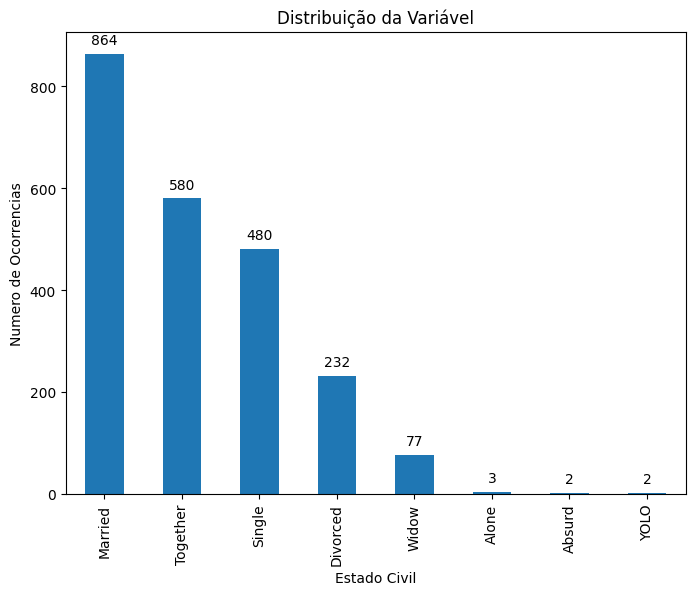

In [18]:
# Definindo o tamanho da figura
plt.figure(figsize=(8,6))  # Configura o tamanho da figura, neste caso 10 unidades de largura e 6 de altura.

# Plotando o gráfico de barras usando o método plot da série
grafico = dataset['Estado_Civil'].value_counts().plot(kind='bar')  
# 'value_counts()' conta a frequência de cada categoria na coluna 'Estado_Civil'. 
# O método 'plot(kind="bar")' cria um gráfico de barras com essas contagens.

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Variável')  # Define o título do gráfico.
plt.xlabel('Estado Civil')  # Define o rótulo do eixo x.
plt.ylabel('Numero de Ocorrencias')  # Define o rótulo do eixo y.

# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico.patches:  # 'grafico.patches' retorna todas as barras no gráfico.
    # Adiciona uma anotação (número total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",  # Formata o valor da altura da barra como um número inteiro.
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição do texto acima da barra (centrado no eixo x e um pouco acima no eixo y).
        ha='center',  # Alinha horizontalmente o texto no centro da barra.
        va='center',  # Alinha verticalmente o texto.
        xytext=(0, 10),  # Desloca o texto 10 pontos acima da altura da barra.
        textcoords='offset points'  # Especifica que o deslocamento do texto será feito em pontos.
    )

# Exibindo o gráfico
plt.show()  # Exibe o gráfico na tela.

Distribuição da variável 'Educacao': Qual é o nível de escolaridade mais comum entre os clientes?

In [19]:
round((dataset["Educacao"].value_counts() / len(dataset) * 100),2)

Educacao
Graduation    50.31
PhD           21.70
Master        16.52
2n Cycle       9.06
Basic          2.41
Name: count, dtype: float64

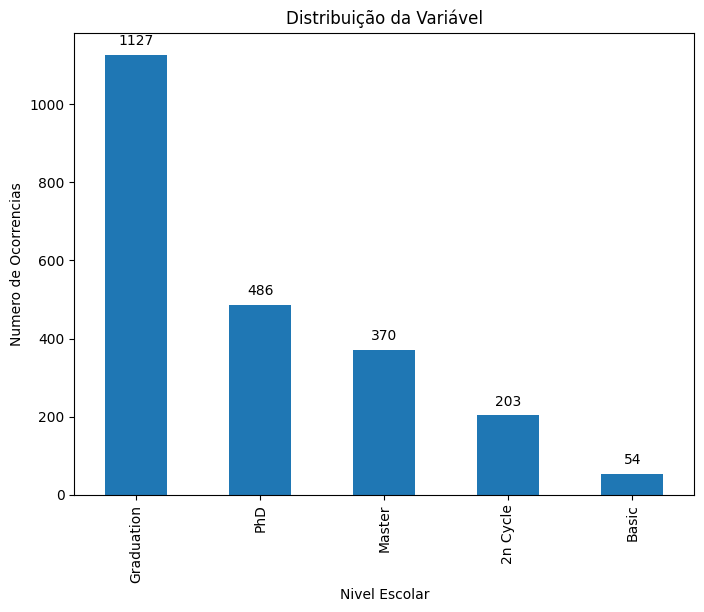

In [20]:
# Definindo o tamanho da figura
plt.figure(figsize=(8,6))  # Configura o tamanho da figura, neste caso 10 unidades de largura e 6 de altura.

# Plotando o gráfico de barras usando o método plot da série
grafico = dataset['Educacao'].value_counts().plot(kind='bar')  
# 'value_counts()' conta a frequência de cada categoria na coluna 'Estado_Civil'. 
# O método 'plot(kind="bar")' cria um gráfico de barras com essas contagens.

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Variável')  # Define o título do gráfico.
plt.xlabel('Nivel Escolar')  # Define o rótulo do eixo x.
plt.ylabel('Numero de Ocorrencias')  # Define o rótulo do eixo y.

# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico.patches:  # 'grafico.patches' retorna todas as barras no gráfico.
    # Adiciona uma anotação (número total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",  # Formata o valor da altura da barra como um número inteiro.
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição do texto acima da barra (centrado no eixo x e um pouco acima no eixo y).
        ha='center',  # Alinha horizontalmente o texto no centro da barra.
        va='center',  # Alinha verticalmente o texto.
        xytext=(0, 10),  # Desloca o texto 10 pontos acima da altura da barra.
        textcoords='offset points'  # Especifica que o deslocamento do texto será feito em pontos.
    )

# Exibindo o gráfico
plt.show()  # Exibe o gráfico na tela.

In [21]:
dataset[['Estado_Civil','Educacao']].value_counts()

Estado_Civil  Educacao  
Married       Graduation    433
Together      Graduation    286
Single        Graduation    252
Married       PhD           192
              Master        138
Divorced      Graduation    119
Together      PhD           117
              Master        106
Single        PhD            98
Married       2n Cycle       81
Single        Master         75
Together      2n Cycle       57
Divorced      PhD            52
Single        2n Cycle       37
Divorced      Master         37
Widow         Graduation     35
              PhD            24
Divorced      2n Cycle       23
Married       Basic          20
Single        Basic          18
Together      Basic          14
Widow         Master         12
              2n Cycle        5
YOLO          PhD             2
Absurd        Master          1
Divorced      Basic           1
Widow         Basic           1
Alone         PhD             1
              Master          1
              Graduation      1
Absurd        G

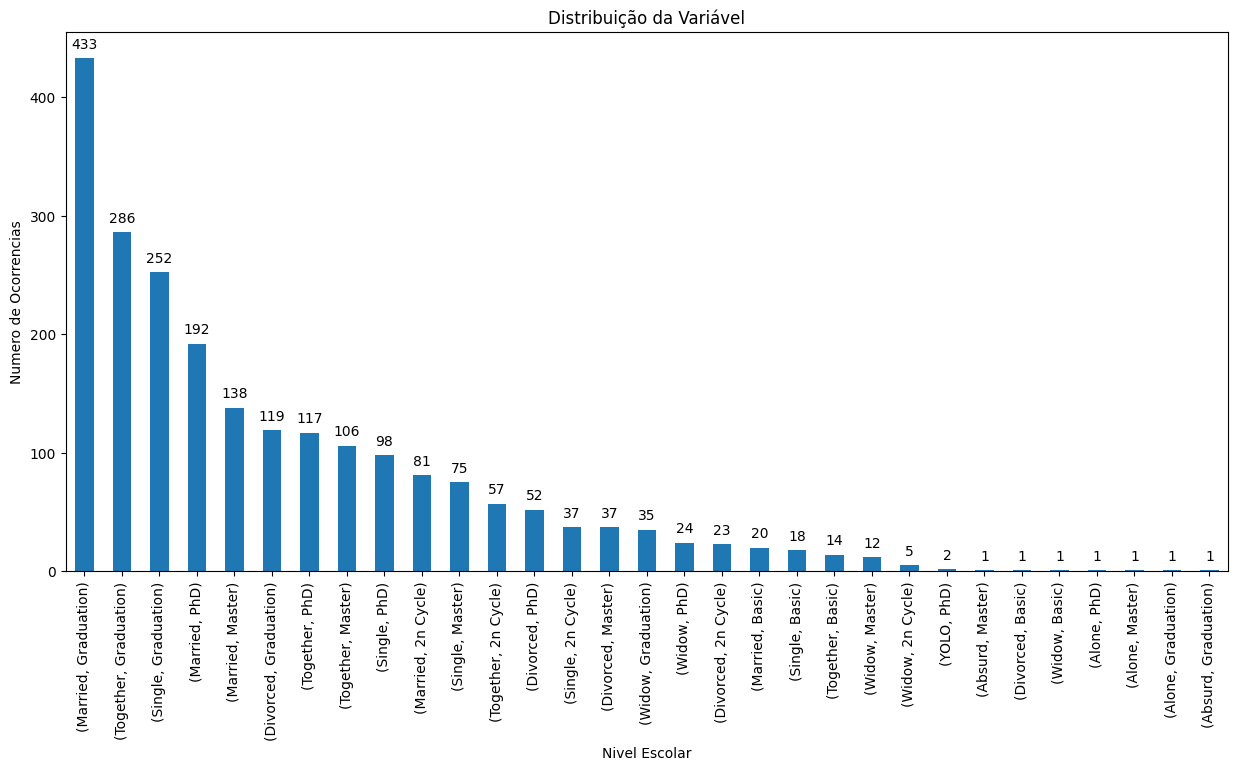

In [22]:
# Definindo o tamanho da figura
plt.figure(figsize=(15,7))  # Configura o tamanho da figura, neste caso 10 unidades de largura e 6 de altura.

# Plotando o gráfico de barras usando o método plot da série
grafico = dataset[['Estado_Civil','Educacao']].value_counts().plot(kind='bar')  
# 'value_counts()' conta a frequência de cada categoria na coluna 'Estado_Civil'. 
# O método 'plot(kind="bar")' cria um gráfico de barras com essas contagens.

# Adicionando título e rótulos aos eixos
plt.title('Distribuição da Variável')  # Define o título do gráfico.
plt.xlabel('Nivel Escolar')  # Define o rótulo do eixo x.
plt.ylabel('Numero de Ocorrencias')  # Define o rótulo do eixo y.

# Itera sobre cada barra (patch) no gráfico de barras
for p in grafico.patches:  # 'grafico.patches' retorna todas as barras no gráfico.
    # Adiciona uma anotação (número total) acima de cada barra
    grafico.annotate(
        f"{p.get_height():.0f}",  # Formata o valor da altura da barra como um número inteiro.
        (p.get_x() + p.get_width() / 2., p.get_height()),  # Define a posição do texto acima da barra (centrado no eixo x e um pouco acima no eixo y).
        ha='center',  # Alinha horizontalmente o texto no centro da barra.
        va='center',  # Alinha verticalmente o texto.
        xytext=(0, 10),  # Desloca o texto 10 pontos acima da altura da barra.
        textcoords='offset points'  # Especifica que o deslocamento do texto será feito em pontos.
    )

# Exibindo o gráfico
plt.show()  # Exibe o gráfico na tela.

#### Análise da Distribuição da Variável: Estado Civil e Nível de Escolaridade

O gráfico apresentado oferece uma visualização interessante da relação entre o estado civil e o nível de escolaridade de um grupo de indivíduos. A seguir, uma análise detalhada das informações contidas no gráfico:

##### Observações Gerais:

* **Maioria com Graduação:** A grande maioria dos indivíduos possui graduação, independentemente do estado civil.
* **Casados com Graduação:** A combinação mais frequente é de pessoas casadas com graduação.
* **Solteiros com Graduação:** A segunda combinação mais frequente é de solteiros com graduação.
* **Concentração nos primeiros níveis:** A maior parte das ocorrências se concentra nas combinações envolvendo graduação, mestrado e, em menor proporção, o segundo ciclo. As categorias de escolaridade básica e os estados civis menos comuns (como "Alone", "Absurd" e "YOLO") apresentam poucas ocorrências.

##### Análise por Estado Civil:

* **Casados:** A maioria dos casados possui graduação, seguido por mestrado. Há uma menor proporção de casados com segundo ciclo e básico.
* **Solteiros:** A maioria dos solteiros também possui graduação, seguido por mestrado. A proporção de solteiros com segundo ciclo e básico é um pouco maior que entre os casados.
* **Divorciados:** A maioria dos divorciados possui graduação, seguido por mestrado. A proporção de divorciados com segundo ciclo e básico é similar à dos solteiros.
* **Viúvos:** A maioria dos viúvos possui graduação, seguido por mestrado. A proporção de viúvos com segundo ciclo e básico é menor que nos outros grupos.
* **Demais categorias:** As categorias "Alone", "Absurd" e "YOLO" apresentam pouquíssimas ocorrências, o que dificulta uma análise mais profunda.

##### Análise por Nível de Escolaridade:

* **Graduação:** A graduação é o nível de escolaridade mais comum em todas as categorias de estado civil.
* **Mestrado:** O mestrado é o segundo nível de escolaridade mais comum, especialmente entre os casados e solteiros.
* **Segundo Ciclo:** O segundo ciclo apresenta um número menor de ocorrências, mas é mais comum entre os solteiros e divorciados.
* **Básico:** O nível básico apresenta a menor quantidade de ocorrências, sendo mais comum entre os solteiros e divorciados.

##### Possíveis Interpretações e Questões:

* **Relação entre Estado Civil e Escolaridade:** Os dados sugerem uma correlação positiva entre o nível de escolaridade e o estado civil "casado". No entanto, é importante ressaltar que a correlação não implica causalidade. Outros fatores, como idade, renda e localização geográfica, podem influenciar essa relação.
* **Heterogeneidade dos Grupos:** A análise pode ser aprofundada ao considerar outras variáveis, como idade, gênero, profissão e renda. Isso permitiria identificar se existem diferenças significativas entre os grupos em relação a essas características.

**Em resumo,** o gráfico indica que há uma forte associação entre o nível de escolaridade e o estado civil, com a maioria das pessoas com graduação sendo casadas ou solteiras. No entanto, são necessárias análises mais aprofundadas para entender as nuances dessa relação e identificar os fatores que a influenciam.

### 2. Mais gráficos e representações:

* Objetivo: Explorar graficamente os gastos dos clientes.

    Distribuição dos gastos por categoria de produto: Compare as variáveis de gastos como Gasto_Vinhos, Gasto_Frutas, Gasto_Carnes, etc.

    Gráficos recomendados: Boxplots para verificar dispersão e outliers em cada tipo de gasto. Utilize gráficos de dispersão para analisar a relação entre os gastos em diferentes categorias.

In [23]:
dados_boxplot = dataset[['Gasto_Vinhos', 'Gasto_Frutas','Gasto_Carnes', 'Gasto_Peixes', 'Gasto_Doces', 'Gasto_ProdutosOuro']]

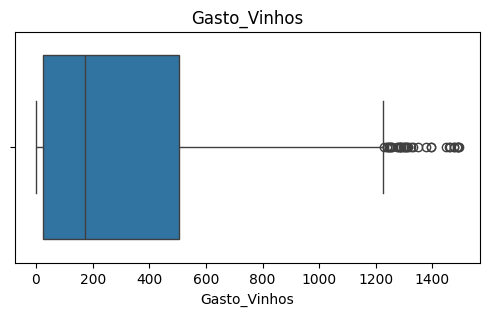

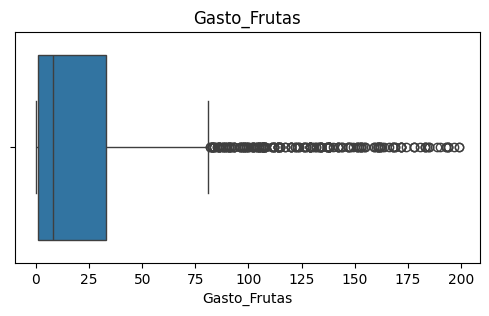

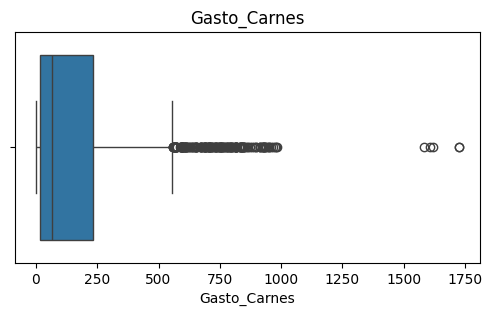

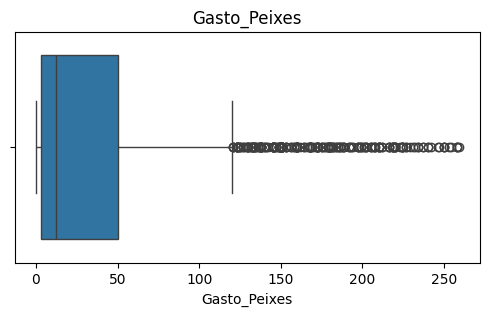

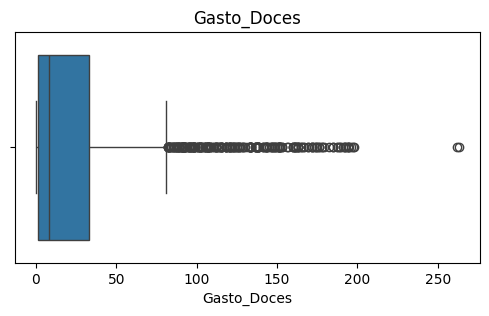

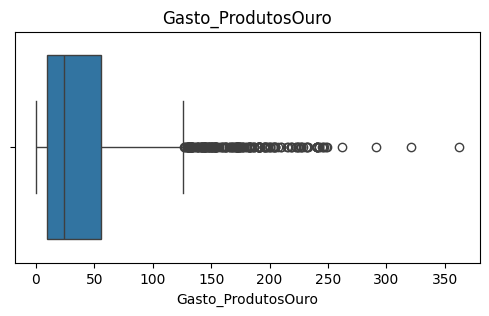

In [24]:
# Visualizando outliers para cada variável no DataFrame
for column in dados_boxplot.columns:                             # Itera sobre todas as colunas do DataFrame
    if dados_boxplot[column].dtype in ['int64', 'float64']:      # Verifica se a coluna é do tipo numérico (int64 ou float64)
        plt.figure(figsize = (6, 3))                             # Define o tamanho da figura para o gráfico
        sns.boxplot(x = dados_boxplot[column])                   # Cria um boxplot para a coluna numérica
        plt.title(column)                                        # Define o título do gráfico como o nome da coluna
        plt.show()                                               # Exibe o gráfico

In [25]:
# Define o Intervalo Interquartil
Q1 = dados_boxplot.quantile(0.25)  # Calcula o primeiro quartil (25º percentil) para cada coluna do DataFrame
Q3 = dados_boxplot.quantile(0.75)  # Calcula o terceiro quartil (75º percentil) para cada coluna do DataFrame
IQR = Q3 - Q1                # Calcula o intervalo interquartil (IQR) subtraindo Q1 de Q3

In [26]:
Q1

Gasto_Vinhos          23.75
Gasto_Frutas           1.00
Gasto_Carnes          16.00
Gasto_Peixes           3.00
Gasto_Doces            1.00
Gasto_ProdutosOuro     9.00
Name: 0.25, dtype: float64

In [27]:
Q3

Gasto_Vinhos          504.25
Gasto_Frutas           33.00
Gasto_Carnes          232.00
Gasto_Peixes           50.00
Gasto_Doces            33.00
Gasto_ProdutosOuro     56.00
Name: 0.75, dtype: float64

In [28]:
IQR                   # Exibe o intervalo interquartil para cada coluna

Gasto_Vinhos          480.5
Gasto_Frutas           32.0
Gasto_Carnes          216.0
Gasto_Peixes           47.0
Gasto_Doces            32.0
Gasto_ProdutosOuro     47.0
dtype: float64

In [29]:
# Vamos checar os valores que estão 1.5 acima ou abaixo do IQR. Esses valores são considerados outliers.
outliers = ((dados_boxplot < (Q1 - 2.5 * IQR)) | (dados_boxplot > (Q3 + 2.5 * IQR))).any(axis = 1)  
# Identifica outliers em cada linha do DataFrame com base no intervalo interquartil (IQR), considerando valores 
# que estão além de 2,5 vezes o IQR abaixo de Q1 ou acima de Q3

In [30]:
# Filtramos os outliers
dataset_outliers = dados_boxplot[outliers]  # Cria um novo DataFrame contendo apenas as linhas identificadas como outliers

# Visualizamos os outliers
dataset_outliers  # Exibe o DataFrame que contém apenas as linhas identificadas como outliers

,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_ProdutosOuro
0,635,88,546,172,88,88
12,194,61,480,225,112,30
18,1012,80,498,0,16,176
21,1,1,1725,1,1,1
27,5,1,3,3,263,362
...,...,...,...,...,...,...
2206,269,129,495,182,43,29
2211,519,71,860,93,27,53
2217,332,194,377,149,125,57
2228,32,2,1607,12,4,22


##### Análise Complementar:


1. **Gasto_Vinhos**: 

   - O IQR muito elevado sugere que existe uma faixa muito ampla de gastos, com alguns clientes provavelmente sendo grandes consumidores de vinhos, enquanto outros gastam muito pouco.
   - É possível que haja **outliers significativos** no topo da distribuição, especialmente entre os clientes de alto valor.

2. **Gasto_Frutas e Gasto_Doces**:
   - Ambos apresentam um IQR baixo, o que indica que a maioria dos clientes gasta de forma semelhante nessas categorias. 
   - A probabilidade de outliers aqui é baixa, e os clientes parecem ter um comportamento de compra uniforme.

3. **Gasto_Carnes**:
   - Um IQR alto sugere que a categoria de carnes também apresenta grande variação no comportamento de gasto dos clientes. 
   - Assim como nos vinhos, alguns clientes podem gastar significativamente mais que outros, e é possível encontrar outliers na parte superior da distribuição.

4. **Gasto_Peixes e Gasto_ProdutosOuro**:
   - Esses têm IQR moderados, o que indica uma dispersão intermediária. 
   - Embora a variação seja maior do que nas frutas e doces, ainda há uma razoável consistência no comportamento de gasto.

#### Conclusão:
- **Categorias como Vinhos e Carnes** apresentam maior variação de gastos, o que sugere perfis de clientes bastante diferentes. 
- É possível que existam **outliers** nessas categorias, principalmente na parte superior da distribuição.

- **Frutas, Doces e Produtos de Ouro** mostram um comportamento mais estável, com variação menor. Isso indica que a maioria dos clientes gasta de forma similar nessas categorias.

### 3. Medidas de tendência central:

Objetivo: Analisar os gastos e renda dos clientes com base em valores centrais.

Calcule a média, mediana e moda dos gastos nas variáveis Gasto_Vinhos, Gasto_Frutas, Gasto_Carnes, Gasto_Peixes, Gasto_Doces, e Renda.

* Perguntas a responder:

    Qual é o gasto médio em vinhos e outros produtos?

    Como a mediana de renda se compara com a média? Existem discrepâncias significativas indicando altos ou baixos fora do padrão?

In [31]:
dataset.columns

Index(['ID', 'Ano_Nascimento', 'Educacao', 'Estado_Civil', 'Renda',
       'Criancas_Casa', 'Adolescentes_Casa', 'Data_Cliente', 'Recompra',
       'Gasto_Vinhos', 'Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
       'Gasto_Doces', 'Gasto_ProdutosOuro', 'Num_Compras_Desconto',
       'Num_Compras_Online', 'Num_Compras_Catalogo', 'Num_Compras_Loja',
       'Num_Visitas_Site_Mes', 'Aceitou_Campanha3', 'Aceitou_Campanha4',
       'Aceitou_Campanha5', 'Aceitou_Campanha1', 'Aceitou_Campanha2',
       'Reclamacao', 'Custo_Contato', 'Receita', 'Resposta'],
      dtype='object')

In [32]:
dataset[['Gasto_Vinhos','Gasto_Frutas', 'Gasto_Carnes', 'Gasto_Peixes',
                 'Gasto_Doces', 'Gasto_ProdutosOuro','Renda']].describe()

,Gasto_Vinhos,Gasto_Frutas,Gasto_Carnes,Gasto_Peixes,Gasto_Doces,Gasto_ProdutosOuro,Renda
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,52247.251354
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,25037.797168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,35538.750000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,51741.500000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,68289.750000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,666666.000000


### 1. **Gasto médio em vinhos e outros produtos.**

Aqui estão os valores médios (médias) de gasto por categoria:

- **Gasto_Vinhos**: \( 303.94 \)
- **Gasto_Frutas**: \( 26.30 \)
- **Gasto_Carnes**: \( 166.95 \)
- **Gasto_Peixes**: \( 37.53 \)
- **Gasto_Doces**: \( 27.06 \)
- **Gasto_ProdutosOuro**: \( 44.02 \)

#### Observações:

- **Vinhos** é a categoria com o gasto médio mais alto (\( 303.94 \)), sugerindo que os clientes estão dispostos a investir mais nessa categoria em comparação com outras.
- **Carnes** também se destaca com um gasto médio (\( 166.95 \)) relativamente alto.
- Em contraste, as categorias **Frutas**, **Doces** e **Peixes** apresentam gastos médios mais baixos, todos em torno de \( 26 - 38 \) unidades, o que sugere um consumo mais moderado nessas categorias.
- **Produtos de Ouro** tem um gasto médio de \( 44.02 \), que é superior a frutas e doces, mas ainda não tão alto quanto vinhos ou carnes.

### 2. **Como a mediana de renda se compara com a média?**

Aqui estão as estatísticas de **Renda**:

- **Média de Renda**: \( 52,247.25 \)
- **Mediana de Renda**: \( 51,741.50 \)

#### Comparação:

- A **média** da renda (\( 52,247.25 \)) é ligeiramente maior que a **mediana** (\( 51,741.50 \)).
- Isso sugere que há alguns clientes com **rendas muito altas** que estão puxando a média para cima, enquanto a maioria dos clientes está próxima da mediana.
- A **discrepância não é muito significativa**, mas o fato da média ser um pouco maior que a mediana indica que pode haver alguns **outliers na parte superior da distribuição**, com clientes de renda excepcionalmente alta (o máximo de renda reportado é \( 666,666.00 \)).

### 3. **Discrepâncias significativas indicando valores fora do padrão?**

Vamos analisar a dispersão para detectar discrepâncias:

- **Desvio padrão da Renda**: \( 25,037.80 \)
  - O desvio padrão é relativamente alto, indicando uma grande variabilidade nas rendas dos clientes. Alguns clientes têm rendas muito acima ou abaixo da média, conforme indicado pelo valor máximo de \( 666,666.00 \) e o valor mínimo de \( 1,730.00 \).
  - A alta dispersão reflete a presença de **clientes fora do padrão**, particularmente no topo da distribuição.

### Resumo da análise:

1. **Gasto Médio**:
   - O **gasto com vinhos** é significativamente mais alto que qualquer outro tipo de produto.
   - **Carnes** também tem um gasto relativamente elevado, seguido por **produtos de ouro**. Por outro lado, **frutas, peixes e doces** têm gastos mais baixos e consistentes entre os clientes.

2. **Renda**:
   - A **mediana da renda** está um pouco abaixo da **média**, sugerindo a existência de **clientes de alto poder aquisitivo** que influenciam a média.
   - O desvio padrão da renda é grande, sugerindo **alta variabilidade**, com clientes de renda extremamente alta ou baixa.
   
Essas informações são fundamentais para decisões estratégicas de segmentação e personalização de campanhas de marketing, onde os clientes podem ser divididos em grupos de maior ou menor poder de compra com base no comportamento de gastos e renda.

### Relatório Final da Análise de Personalidade do Cliente

#### 1. Objetivo do Estudo
O objetivo principal deste estudo é ajudar a equipe de marketing a otimizar suas campanhas, segmentar clientes e melhorar o relacionamento com eles, utilizando uma análise detalhada dos atributos dos clientes e suas interações com a empresa.

#### 2. Carregamento e Exploração dos Dados
Para realizar a análise, foram utilizadas as bibliotecas Numpy, Pandas, Seaborn e Matplotlib. O dataset contém 2240 registros e 29 colunas, incluindo informações como ID, Ano de Nascimento, Educação, Estado Civil, Renda, entre outras.

#### 3. Limpeza e Organização dos Dados
Foi realizada a identificação e preenchimento de valores nulos, especialmente na coluna de Renda. As colunas foram renomeadas para facilitar a compreensão, por exemplo, "Year_Birth" foi renomeada para "Ano_Nascimento".

#### 4. Análise Descritiva

##### 4.1 Distribuição de Frequência
- **Estado Civil**:
  - Casados: 38.57%
  - Vivendo Juntos: 25.89%
  - Solteiros: 21.43%
  - Divorciados: 10.36%
  - Outros (Viúvos, Sozinhos, etc.): Menos de 4%

- **Educação**:
  - Graduação: 50.31%
  - PhD: 21.70%
  - Mestrado: 16.52%
  - Segundo Ciclo: 9.06%
  - Básico: 2.41%

##### 4.2 Distribuição dos Gastos
- **Gastos por Categoria**:
  - Vinhos: Média de 303.94
  - Carnes: Média de 166.95
  - Produtos de Ouro: Média de 44.02
  - Frutas: Média de 26.30
  - Peixes: Média de 37.53
  - Doces: Média de 27.06

- **Boxplots**: Utilizados para identificar outliers em cada categoria de gasto.

##### 4.3 Medidas de Tendência Central
- **Renda**:
  - Média: 52,247.25
  - Mediana: 51,741.50
  - Desvio Padrão: 25,037.80

- **Gastos Médios**:
  - Vinhos e Carnes têm os maiores gastos médios.
  - Frutas e Doces têm os menores gastos médios.

#### 5. Conclusões
A análise revelou perfis distintos de clientes com base em comportamento de gastos e renda. Clientes com maior poder aquisitivo tendem a gastar mais em vinhos e carnes, enquanto a maioria dos clientes apresenta gastos mais moderados em frutas e doces.

#### 6. Recomendações
- **Campanhas Personalizadas**: Desenvolver campanhas específicas para diferentes segmentos de clientes, focando em produtos de maior interesse como vinhos e carnes.
- **Análise Contínua**: Continuar monitorando e analisando os dados dos clientes para ajustar as estratégias de marketing conforme necessário.
- **Segmentação de Clientes**: Utilizar as informações de renda e comportamento de gastos para segmentar os clientes em grupos de maior ou menor poder de compra, personalizando as ofertas e comunicações para cada segmento.

